In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# re(regular expression) is a module for string matching
# and searching for a text at a specific pattern or directory.
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [7]:
# Printing the list of English stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Preprocessing

In [8]:
# Load the dataset
df = pd.read_csv('data.csv')

# print the first 5 rows of the dataset
print(df.head())

                                                URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singe

In [9]:
df.shape

(4009, 4)

In [10]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [11]:
df = df.rename(columns={'Headline': 'title'})
df.columns

Index(['URLs', 'title', 'Body', 'Label'], dtype='object')

In [ ]:
# Drop the 'URLs' column
# This column is not needed for the analysis
# This operation has been performed lately.
df = df.drop(columns=['URLs'])

In [12]:
# 1--> fake
# 0--> real
df['Label']

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

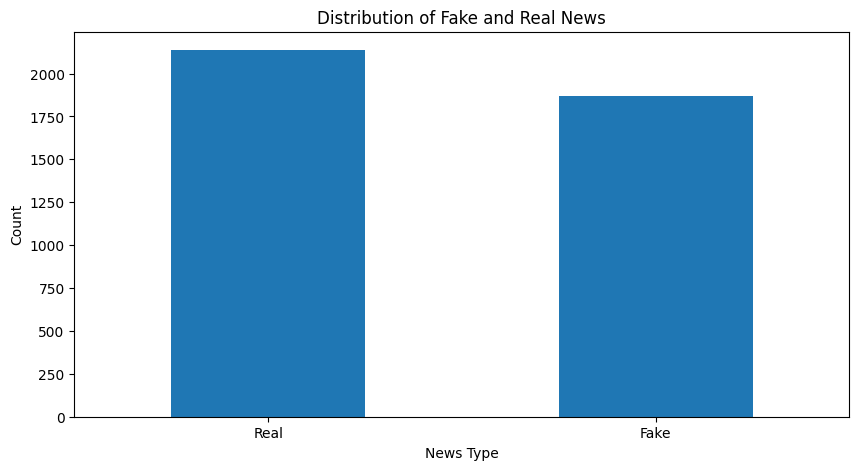

In [ ]:
plt.figure(figsize=(10, 5))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'], rotation=0)
plt.show()

In [ ]:
# this operation has been updated lately,
# so you will find that the body col has no nulls.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4009 non-null   object
 1   Body     4009 non-null   object
 2   Label    4009 non-null   int64 
 3   content  4009 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [18]:
df.isnull().sum()

URLs      0
title     0
Body     21
Label     0
dtype: int64

In [19]:
#Replacing the null values with empty string
df['Body'] = df['Body'].fillna('')

In [20]:
df.isnull().sum()

URLs     0
title    0
Body     0
Label    0
dtype: int64

In [21]:
# combining the title and body into one column
df['content'] = df['title']+' '+df['Body']

In [26]:
df.columns

Index(['title', 'Body', 'Label', 'content'], dtype='object')

In [22]:
df['content'].head()

0    Four ways Bob Corker skewered Donald Trump Ima...
1    Linklater's war veteran comedy speaks to moder...
2    Trump’s Fight With Corker Jeopardizes His Legi...
3    Egypt's Cheiron wins tie-up with Pemex for Mex...
4    Jason Aldean opens 'SNL' with Vegas tribute Co...
Name: content, dtype: object

In [27]:
# Seprating the data and label
X = df.drop(columns='Label', axis=1)
y = df['Label']

In [28]:
print(X)

                                                  title  \
0            Four ways Bob Corker skewered Donald Trump   
1     Linklater's war veteran comedy speaks to moder...   
2     Trump’s Fight With Corker Jeopardizes His Legi...   
3     Egypt's Cheiron wins tie-up with Pemex for Mex...   
4           Jason Aldean opens 'SNL' with Vegas tribute   
...                                                 ...   
4004                                    Trends to Watch   
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...   
4006        Ron Paul on Trump, Anarchism & the AltRight   
4007  China to accept overseas trial data in bid to ...   
4008  Vice President Mike Pence Leaves NFL Game Beca...   

                                                   Body  \
0     Image copyright Getty Images\nOn Sunday mornin...   
1     LONDON (Reuters) - “Last Flag Flying”, a comed...   
2     The feud broke into public view last week when...   
3     MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...

In [29]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64


In [30]:
X.shape, y.shape

((4009, 3), (4009,))

Stemming:
Stemming is the process of reducing a work to its Root word
Example:
actor, actess, acting --> act

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content) # Remove all non-alphabetic characters and replace them with space
    stemmed_content = stemmed_content.lower() # Convert to lowercase
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [33]:
df['content'] = df['content'].apply(stemming)

In [34]:
print(df['content'])

0       four way bob corker skewer donald trump imag c...
1       linklat war veteran comedi speak modern americ...
2       trump fight corker jeopard legisl agenda feud ...
3       egypt cheiron win tie pemex mexican onshor oil...
4       jason aldean open snl vega tribut countri sing...
                              ...                        
4004    trend watch trend watch reader think stori fac...
4005    trump jr soon give minut speech trump jr soon ...
4006                       ron paul trump anarch altright
4007    china accept oversea trial data bid speed drug...
4008    vice presid mike penc leav nfl game anti ameri...
Name: content, Length: 4009, dtype: object


In [35]:
# Seprating the data and label
X = df['content'].values
y = df['Label'].values

In [36]:
print(X)

['four way bob corker skewer donald trump imag copyright getti imag sunday morn donald trump went twitter tirad member parti exactli huge news far first time presid turn rhetor cannon rank time howev attack particularli bite person essenti call tennesse senat bob corker chair power senat foreign relat committe coward run elect said mr corker beg presid endors refus give wrongli claim mr corker support iranian nuclear agreement polit accomplish unlik colleagu mr corker free worri immedi polit futur hold tongu skip twitter post senbobcork shame white hous becom adult day care center someon obvious miss shift morn senat bob corker senbobcork octob report end though spoke new york time realli let presid four choic quot tennesse senat interview time particularli damn know presid tweet thing true know everyon know realli sugarcoat one mr corker flat say presid liar everyon know senat particular challeng mr trump insist unsuccess plead endors accus much broader mr corker presid use someth aki

In [37]:
print(y)

[1 1 1 ... 0 1 0]


In [38]:
X.shape, y.shape

((4009,), (4009,))

In [39]:
# Converting the text data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [43]:
print(X)

  (0, 30184)	0.015577335446991065
  (0, 30105)	0.010138100956414153
  (0, 29925)	0.04071381287423977
  (0, 29866)	0.02302556735837691
  (0, 29839)	0.02594843079913226
  (0, 29701)	0.02731627067801335
  (0, 29551)	0.0903446717463179
  (0, 29459)	0.021597618227067437
  (0, 29444)	0.017771302554684214
  (0, 29311)	0.02697433639807544
  (0, 29222)	0.018730200435309236
  (0, 29075)	0.021387359321615517
  (0, 28853)	0.02468949435722926
  (0, 28802)	0.024215820940514617
  (0, 28753)	0.03475630898700329
  (0, 28690)	0.029253905378133573
  (0, 28537)	0.02391375950042295
  (0, 28523)	0.024497471826251886
  (0, 28449)	0.019495776258929093
  (0, 28383)	0.036139116901976395
  (0, 28337)	0.03646156433375988
  (0, 28328)	0.037974920420926095
  (0, 28300)	0.037167646453401565
  (0, 28252)	0.023056310182459756
  (0, 28229)	0.01446617290179376
  :	:
  (4008, 6338)	0.042467699965906804
  (4008, 6225)	0.020215512049593334
  (4008, 5853)	0.03714317999258209
  (4008, 5597)	0.020634751853156684
  (4008, 5544

In [44]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Modeling
Training a Logistic Regression Model

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation
  Accuracy_score

In [54]:
# Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.9912690988462738


In [55]:
# Accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.9750623441396509


Prediction System

In [61]:
# 1--> fake
# 0--> real
X_new = X_test[3]
prediction = model.predict(X_new)
print(prediction)
print('The news is: ', 'Fake' if prediction[0] == 1 else 'Real')

[0]
The news is:  Real


In [62]:
print(y_test[3])

0
